# چیلنج: ڈیٹا سائنس کے بارے میں متن کا تجزیہ

> *اس نوٹ بک میں، ہم مختلف یو آر ایل - ویکیپیڈیا کے مشین لرننگ کے مضمون کا استعمال کرنے کا تجربہ کرتے ہیں۔ آپ دیکھ سکتے ہیں کہ، ڈیٹا سائنس کے برعکس، اس مضمون میں بہت سے اصطلاحات شامل ہیں، جو تجزیے کو زیادہ مشکل بنا دیتی ہیں۔ ہمیں کلیدی الفاظ نکالنے کے بعد ڈیٹا کو صاف کرنے کا ایک اور طریقہ تلاش کرنا ہوگا تاکہ کچھ عام لیکن غیر معنی خیز لفظی مجموعوں سے چھٹکارا حاصل کیا جا سکے۔*

اس مثال میں، آئیے ایک سادہ مشق کریں جو روایتی ڈیٹا سائنس کے عمل کے تمام مراحل کا احاطہ کرتی ہے۔ آپ کو کوئی کوڈ لکھنے کی ضرورت نہیں ہے، آپ صرف نیچے دیے گئے سیلز پر کلک کر کے انہیں چلا سکتے ہیں اور نتیجہ دیکھ سکتے ہیں۔ ایک چیلنج کے طور پر، آپ کو مختلف ڈیٹا کے ساتھ اس کوڈ کو آزمانے کی ترغیب دی جاتی ہے۔

## مقصد

اس سبق میں، ہم نے ڈیٹا سائنس سے متعلق مختلف تصورات پر بات کی ہے۔ آئیے **ٹیکسٹ مائننگ** کے ذریعے مزید متعلقہ تصورات دریافت کرنے کی کوشش کریں۔ ہم ڈیٹا سائنس کے بارے میں ایک متن سے آغاز کریں گے، اس سے کلیدی الفاظ نکالیں گے، اور پھر نتیجہ کو بصری شکل دینے کی کوشش کریں گے۔

بطور متن، میں ویکیپیڈیا پر ڈیٹا سائنس کے صفحے کا استعمال کروں گا:


In [2]:
url = 'https://en.wikipedia.org/wiki/Data_science'
url = 'https://en.wikipedia.org/wiki/Machine_learning'

## مرحلہ 1: ڈیٹا حاصل کرنا

ڈیٹا سائنس کے ہر عمل کا پہلا مرحلہ ڈیٹا حاصل کرنا ہوتا ہے۔ ہم اس کے لیے `requests` لائبریری استعمال کریں گے:


In [3]:
import requests

text = requests.get(url).content.decode('utf-8')
print(text[:1000])

<!DOCTYPE html>
<html class="client-nojs" lang="en" dir="ltr">
<head>
<meta charset="UTF-8"/>
<title>Machine learning - Wikipedia</title>
<script>document.documentElement.className="client-js";RLCONF={"wgBreakFrames":!1,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"77162785-16e9-4d7f-a175-7f3fcf502a66","wgCSPNonce":!1,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"Machine_learning","wgTitle":"Machine learning","wgCurRevisionId":1041247229,"wgRevisionId":1041247229,"wgArticleId":233488,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["CS1 errors: missing periodical","Harv and Sfn no-target errors","CS1 maint: uses authors parameter","Articles with short description","Short description is dif

## مرحلہ 2: ڈیٹا کو تبدیل کرنا

اگلا مرحلہ یہ ہے کہ ڈیٹا کو اس شکل میں تبدیل کیا جائے جو پروسیسنگ کے لیے موزوں ہو۔ ہمارے معاملے میں، ہم نے صفحے سے HTML سورس کوڈ ڈاؤن لوڈ کیا ہے، اور ہمیں اسے سادہ متن میں تبدیل کرنے کی ضرورت ہے۔

یہ کام کرنے کے کئی طریقے ہیں۔ ہم Python کے سب سے آسان بلٹ ان [HTMLParser](https://docs.python.org/3/library/html.parser.html) آبجیکٹ کا استعمال کریں گے۔ ہمیں `HTMLParser` کلاس کو سب کلاس کرنا ہوگا اور ایسا کوڈ ڈیفائن کرنا ہوگا جو HTML ٹیگز کے اندر موجود تمام متن کو جمع کرے، سوائے `<script>` اور `<style>` ٹیگز کے۔


In [4]:
from html.parser import HTMLParser

class MyHTMLParser(HTMLParser):
    script = False
    res = ""
    def handle_starttag(self, tag, attrs):
        if tag.lower() in ["script","style"]:
            self.script = True
    def handle_endtag(self, tag):
        if tag.lower() in ["script","style"]:
            self.script = False
    def handle_data(self, data):
        if str.strip(data)=="" or self.script:
            return
        self.res += ' '+data.replace('[ edit ]','')

parser = MyHTMLParser()
parser.feed(text)
text = parser.res
print(text[:1000])

 Machine learning - Wikipedia Machine learning From Wikipedia, the free encyclopedia Jump to navigation Jump to search Study of algorithms that improve automatically through experience For the journal, see  Machine Learning (journal) . "Statistical learning" redirects here. For statistical learning in linguistics, see  statistical learning in language acquisition . Part of a series on Artificial intelligence Major goals Artificial general intelligence Planning Computer vision General game playing Knowledge reasoning Machine learning Natural language processing Robotics Approaches Symbolic Deep learning Bayesian networks Evolutionary algorithms Philosophy Ethics Existential risk Turing test Chinese room Control problem Friendly AI History Timeline Progress AI winter Technology Applications Projects Programming languages Glossary Glossary v t e Part of a series on Machine learning and  data mining Problems Classification Clustering Regression Anomaly detection Data Cleaning AutoML Associ

## مرحلہ 3: بصیرت حاصل کرنا

سب سے اہم مرحلہ یہ ہے کہ اپنے ڈیٹا کو ایسی شکل میں تبدیل کریں جس سے ہم بصیرت حاصل کر سکیں۔ ہمارے معاملے میں، ہم متن سے کلیدی الفاظ نکالنا چاہتے ہیں اور دیکھنا چاہتے ہیں کہ کون سے کلیدی الفاظ زیادہ معنی خیز ہیں۔

ہم کلیدی الفاظ نکالنے کے لیے Python کی لائبریری [RAKE](https://github.com/aneesha/RAKE) استعمال کریں گے۔ سب سے پہلے، اگر یہ لائبریری موجود نہ ہو تو اسے انسٹال کریں:


In [5]:
import sys
!{sys.executable} -m pip install nlp_rake

C:\winapp\Miniconda3\lib\site-packages\secretstorage\dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
C:\winapp\Miniconda3\lib\site-packages\secretstorage\util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes


`Rake` کی بنیادی فعالیت دستیاب ہے، جسے ہم کچھ پیرامیٹرز کا استعمال کرتے ہوئے حسب ضرورت بنا سکتے ہیں۔ ہمارے معاملے میں، ہم کلیدی لفظ کی کم از کم لمبائی 5 حروف، دستاویز میں کلیدی لفظ کی کم از کم تکرار 3، اور کلیدی لفظ میں زیادہ سے زیادہ الفاظ کی تعداد 2 مقرر کریں گے۔ دیگر اقدار کے ساتھ تجربہ کرنے اور نتیجہ دیکھنے کے لیے آزاد محسوس کریں۔


In [6]:
import nlp_rake
extractor = nlp_rake.Rake(max_words=2,min_freq=3,min_chars=5)
res = extractor.apply(text)
res

[('data mining', 4.0),
 ('polynomial time', 4.0),
 ('dimensionality reduction', 4.0),
 ('anomaly detection', 4.0),
 ('data set', 4.0),
 ('bayesian networks', 4.0),
 ('language corpora', 4.0),
 ('mcgraw hill', 4.0),
 ('mit press', 4.0),
 ('retrieved 2018-08-20', 4.0),
 ('artificial neuron', 3.9642857142857144),
 ('statistical learning', 3.9470198675496686),
 ('feature learning', 3.9470198675496686),
 ('reinforcement learning', 3.9470198675496686),
 ('deep learning', 3.9470198675496686),
 ('main article', 3.9411764705882355),
 ('machine learning', 3.9144111718974948),
 ('pattern recognition', 3.9),
 ('neural networks', 3.875),
 ('artificial intelligence', 3.864285714285714),
 ('supervised learning', 3.835908756438558),
 ('speech recognition', 3.833333333333333),
 ('bayesian network', 3.833333333333333),
 ('explicitly programmed', 3.8),
 ('biological brain', 3.8),
 ('unsupervised learning', 3.780353200883002),
 ('outlier detection', 3.75),
 ('ieee transactions', 3.75),
 ('isbn 978-0-262-0

ہم نے ایک فہرست حاصل کی ہے جس میں شرائط اور ان کے ساتھ اہمیت کی ڈگری شامل ہے۔ جیسا کہ آپ دیکھ سکتے ہیں، سب سے متعلقہ شعبے، جیسے مشین لرننگ اور بڑا ڈیٹا، فہرست میں اوپر کی پوزیشنز پر موجود ہیں۔

## مرحلہ 4: نتیجہ کو بصری طور پر دیکھنا

لوگ ڈیٹا کو بصری شکل میں سب سے بہتر سمجھ سکتے ہیں۔ اس لیے اکثر ڈیٹا کو بصری طور پر پیش کرنا معنی خیز ہوتا ہے تاکہ کچھ بصیرت حاصل کی جا سکے۔ ہم Python میں `matplotlib` لائبریری کا استعمال کر سکتے ہیں تاکہ کلیدی الفاظ کی تقسیم کو ان کی اہمیت کے ساتھ سادہ انداز میں پیش کیا جا سکے۔


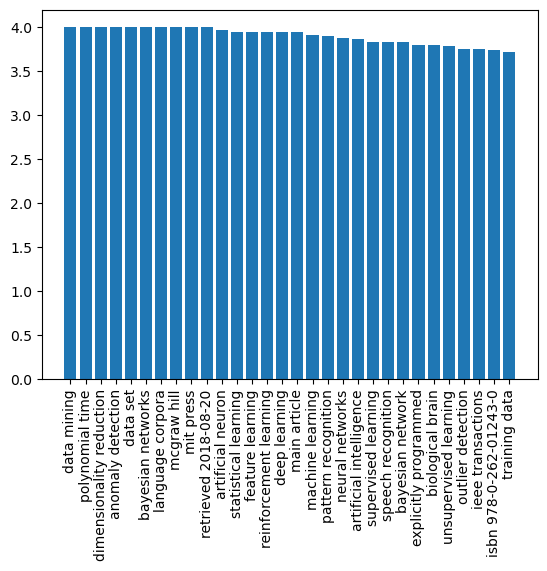

In [9]:
import matplotlib.pyplot as plt

def plot(pair_list):
    k,v = zip(*pair_list)
    plt.bar(range(len(k)),v)
    plt.xticks(range(len(k)),k,rotation='vertical')
    plt.show()

plot(res[:30])

تاہم، الفاظ کی تعداد کو دیکھنے کا ایک اور بھی بہتر طریقہ ہے - **ورڈ کلاوڈ** کا استعمال۔ ہمیں اپنی کلیدی الفاظ کی فہرست سے ورڈ کلاوڈ بنانے کے لیے ایک اور لائبریری انسٹال کرنے کی ضرورت ہوگی۔


In [71]:
!{sys.executable} -m pip install wordcloud

`ورڈکلاوڈ` آبجیکٹ اصل متن یا پہلے سے حساب شدہ الفاظ کی فہرست ان کی فریکوئنسی کے ساتھ لینے کا ذمہ دار ہے، اور ایک تصویر واپس کرتا ہے، جسے پھر `matplotlib` کا استعمال کرتے ہوئے دکھایا جا سکتا ہے:


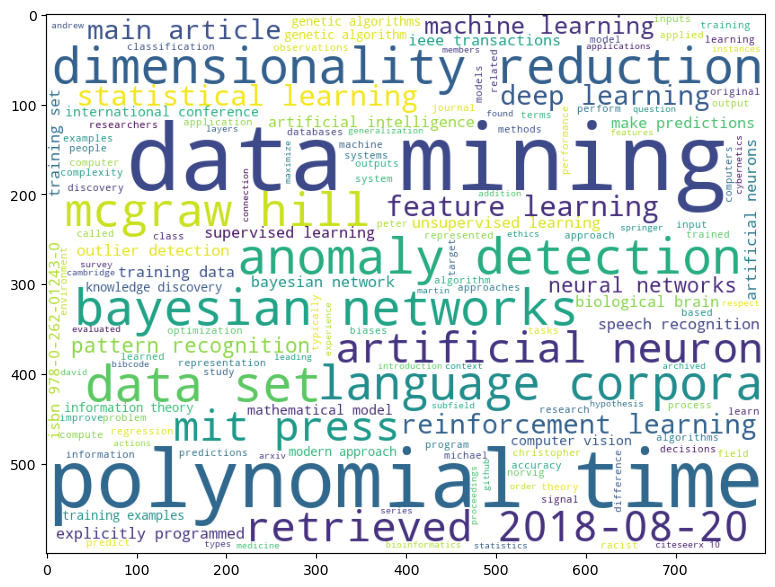

In [12]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wc = WordCloud(background_color='white',width=800,height=600)
plt.figure(figsize=(15,7))
plt.imshow(wc.generate_from_frequencies({ k:v for k,v in res }))
plt.show()

ہم اصل متن کو بھی `WordCloud` میں دے سکتے ہیں - آئیے دیکھتے ہیں کہ کیا ہم اسی طرح کا نتیجہ حاصل کر پاتے ہیں:


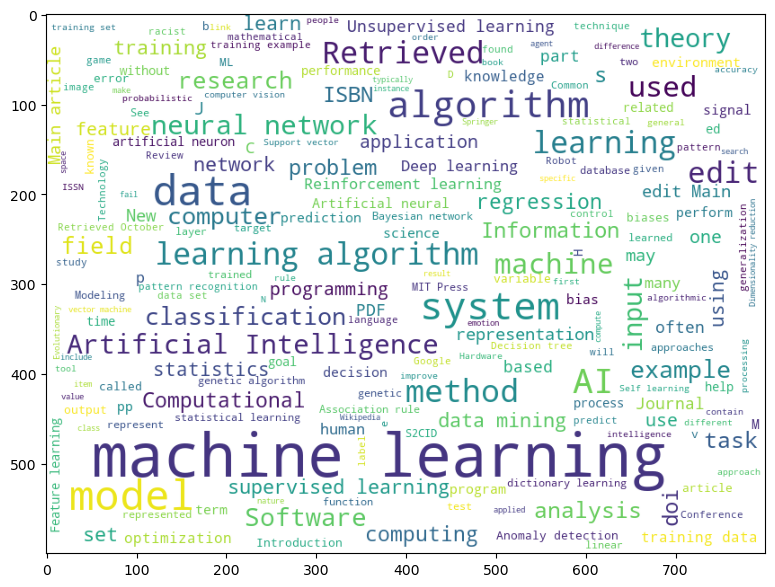

In [13]:
plt.figure(figsize=(15,7))
plt.imshow(wc.generate(text))
plt.show()

In [61]:
wc.generate(text).to_file('images/ds_wordcloud.png')

آپ دیکھ سکتے ہیں کہ لفظی بادل اب زیادہ متاثر کن لگتا ہے، لیکن اس میں بہت زیادہ شور بھی شامل ہے (مثال کے طور پر، غیر متعلقہ الفاظ جیسے `Retrieved on`)۔ اس کے علاوہ، ہمیں دو الفاظ پر مشتمل کم کلیدی الفاظ ملتے ہیں، جیسے *data scientist* یا *computer science*۔ اس کی وجہ یہ ہے کہ RAKE الگورتھم متن سے اچھے کلیدی الفاظ منتخب کرنے میں کہیں بہتر کام کرتا ہے۔ یہ مثال ڈیٹا کی پیشگی پروسیسنگ اور صفائی کی اہمیت کو واضح کرتی ہے، کیونکہ آخر میں ایک واضح تصویر ہمیں بہتر فیصلے کرنے کی اجازت دے گی۔

اس مشق میں ہم نے ویکیپیڈیا کے متن سے کچھ مطلب نکالنے کے ایک سادہ عمل کو دیکھا، کلیدی الفاظ اور لفظی بادل کی شکل میں۔ یہ مثال کافی سادہ ہے، لیکن یہ ان تمام عام مراحل کو اچھی طرح ظاہر کرتی ہے جو ایک ڈیٹا سائنسدان ڈیٹا کے ساتھ کام کرتے وقت اختیار کرتا ہے، ڈیٹا کے حصول سے لے کر بصری نمائندگی تک۔

ہمارے کورس میں ہم ان تمام مراحل پر تفصیل سے بات کریں گے۔



---

**ڈسکلیمر**:  
یہ دستاویز AI ترجمہ سروس [Co-op Translator](https://github.com/Azure/co-op-translator) کا استعمال کرتے ہوئے ترجمہ کی گئی ہے۔ ہم درستگی کے لیے کوشش کرتے ہیں، لیکن براہ کرم آگاہ رہیں کہ خودکار ترجمے میں غلطیاں یا غیر درستیاں ہو سکتی ہیں۔ اصل دستاویز کو اس کی اصل زبان میں مستند ذریعہ سمجھا جانا چاہیے۔ اہم معلومات کے لیے، پیشہ ور انسانی ترجمہ کی سفارش کی جاتی ہے۔ ہم اس ترجمے کے استعمال سے پیدا ہونے والی کسی بھی غلط فہمی یا غلط تشریح کے ذمہ دار نہیں ہیں۔
